In [1]:
import numpy as np
from ipywidgets import interactive
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 創建所需線性代數函式(內積與距離計算)


以下以二維向量為例-----

內積: $v \cdot w = v_1 w_1 + v_2 w_2$

距離公式(向量$v$與向量$w$之間的距離): $\sqrt{(v_1-v_2)^2+(w_1-w_2)^2} = v^T v + w^T w - 2 v \cdot w$

In [2]:
def inner_product(v, w):
    """內積函式"""
    if len(v) != len(w):  # 做內積的兩個向量要等長，否則出現error
        print("Error! dimension of two vector must be the same.")
        return 0

    inner_product = 0
    for i in range(len(v)):
        inner_product += v[i]*w[i]

    return inner_product

def distance(v, w):
    """計算距離的函式"""
    if len(v) != len(w):
        print("Error! dimension of two vector must be the same.")
        return 0

    distance = inner_product(v, v) + inner_product(w, w) - 2*inner_product(v, w)
    return np.sqrt(distance)


### 創建從字典的value尋找key的方法
dictionary.item() = {(key1, value1), (key2, value2), ...}

In [3]:
def get_key(dictionary, value):
    """從字典中用value尋找key"""
    n_dic = {value: key for (key, value) in dictionary.items()}
    n_value = n_dic[value]
    return n_value

### 設定每個餐廳的座標和使用者初始位置

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Pei\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Pei\AppData\Local\Temp\ipykernel_6500\2977723843.py", line 10, in process_input
    user_z = float(entry_z.get())
ValueError: could not convert string to float: ''


User X: 1.0
User Y: 2.0
User Z: 3.0


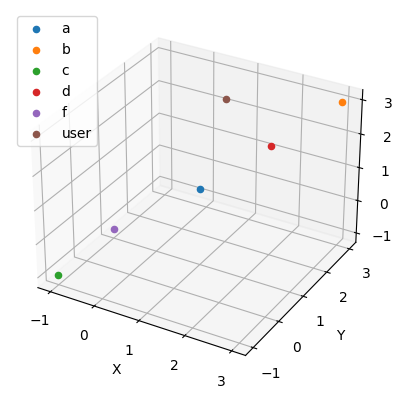

第幾天: 1   要去的餐廳為: d   距離為: 1.4142135623730951
第幾天: 2   要去的餐廳為: b   距離為: 1.7320508075688772
第幾天: 3   要去的餐廳為: d   距離為: 1.7320508075688772
第幾天: 4   要去的餐廳為: b   距離為: 1.7320508075688772
第幾天: 5   要去的餐廳為: d   距離為: 1.7320508075688772
第幾天: 6   要去的餐廳為: b   距離為: 1.7320508075688772
第幾天: 7   要去的餐廳為: d   距離為: 1.7320508075688772
User X: 6.0
User Y: 4.0
User Z: -1.0


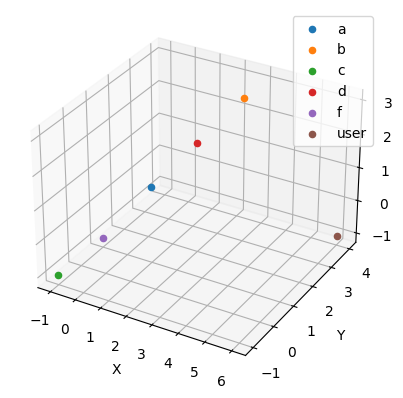

第幾天: 1   要去的餐廳為: b   距離為: 5.0990195135927845
第幾天: 2   要去的餐廳為: d   距離為: 1.7320508075688772
第幾天: 3   要去的餐廳為: b   距離為: 1.7320508075688772
第幾天: 4   要去的餐廳為: d   距離為: 1.7320508075688772
第幾天: 5   要去的餐廳為: b   距離為: 1.7320508075688772
第幾天: 6   要去的餐廳為: d   距離為: 1.7320508075688772
第幾天: 7   要去的餐廳為: b   距離為: 1.7320508075688772


In [4]:
import tkinter as tk

user_x = 0.
user_y = 0.
user_z = 0.

def process_input():
    user_x = float(entry_x.get())
    user_y = float(entry_y.get())
    user_z = float(entry_z.get())
    print("User X:", user_x)
    print("User Y:", user_y)
    print("User Z:", user_z)
    user_loc = [user_x, user_y, user_z]
    
    
    # 設定餐廳初始位置
    x1, y1, z1 = 1., 1., 1.
    x2, y2, z2 = 3., 3., 3.
    x3, y3, z3 = -1., -1., -1.
    x4, y4, z4 = 2., 2., 2.
    x5, y5, z5 = -1., 1., -1.,
    restaurant_dic = {'a':[x1, y1, z1], 'b':[x2, y2, z2], 'c':[x3, y3, z3], 'd':[x4, y4, z4], 'f':[x5, y5, z5]}
    
    # 建立3D圖形
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 繪製每個餐廳位置
    for restaurant, location in restaurant_dic.items():
        x, y, z = location
        ax.scatter(x, y, z, label=restaurant)

    ax.scatter(user_x, user_y, user_z, label='user')
    # 設置坐標軸標籤
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # 添加圖例
    ax.legend()

    # 顯示圖形
    plt.show()
    
    
    restaurant_names = list(restaurant_dic.keys())  # 建立有所有餐廳名字的列表
    restaurant_pre = None  # 設定昨天去過的餐廳變數，初始化為None

    for day in range(1, 1+7):
        restaurant_ava = list(restaurant_dic.keys())  # 創建"今天可以去的餐廳"列表
        if restaurant_pre != None:
            restaurant_ava.remove(restaurant_pre)  # 扣除昨天去過的餐廳

        dis_dic = {}
        for i in restaurant_ava:
            restaurant_loc = restaurant_dic[i]
            dis_dic[i] = distance(user_loc, restaurant_loc)  # 計算出所有餐廳離目前使用者的距離，創立{餐廳名字:距離}字典

        dis_list = list(dis_dic.values()) # 將剛剛的{餐廳名字:距離}字典，取出距離作成列表
        dis_list.sort()  # 將列表元素由小到大排列
        nearest_dis = dis_list[0]  # 元素的第一個就是最短距離
        restaurant_pre = get_key(dis_dic, nearest_dis)  # 得到最短距離的餐廳名稱，放入restaurant_pre參數
        user_loc = restaurant_dic[restaurant_pre]  # 將使用者移動到今天的餐廳位置

        print('第幾天:', day, '  要去的餐廳為:', restaurant_pre, '  距離為:', nearest_dis)


    
# 建主窗口
window = tk.Tk()

# 標籤
label_x = tk.Label(window, text="User X:")
label_x.pack()
entry_x = tk.Entry(window)
entry_x.pack()

label_y = tk.Label(window, text="User Y:")
label_y.pack()
entry_y = tk.Entry(window)
entry_y.pack()

label_z = tk.Label(window, text="User Z:")
label_z.pack()
entry_z = tk.Entry(window)
entry_z.pack()

# 創建按鈕
button = tk.Button(window, text="Process", command=process_input)
button.pack()

# 運行主循環
window.mainloop()